In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-agriculture-related-datasets-for-india/csv


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
columns=[
    "start","district","market","commodity","variety","arrival_date","min_price","max_price","model_price"
]
data=pd.read_csv("/kaggle/input/all-agriculture-related-datasets-for-india/csv")

In [12]:
data=pd.get_dummies(data,columns=["state","district","market","commodity","variety"],drop_first=True)
data.drop(["arrival_date"],axis=1,inplace=True)

In [13]:
x=data.drop("modal_price",axis=1)
y=data["modal_price"]
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([
    Dense(128,activation='relu',input_shape=(x_train.shape[1],)),Dense(64,activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

# Early Stopping 
## call back to monitor validation loss

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping =EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [21]:
history=model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 54899564.0000 - mae: 3067.5588 - val_loss: 13677173.0000 - val_mae: 2548.3943
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15558840.0000 - mae: 2647.9785 - val_loss: 12521018.0000 - val_mae: 2367.5818
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21453698.0000 - mae: 2499.4287 - val_loss: 9657165.0000 - val_mae: 1893.0115
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12202017.0000 - mae: 1740.3212 - val_loss: 6263114.5000 - val_mae: 1386.8934
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10942935.0000 - mae: 1279.4656 - val_loss: 4747707.5000 - val_mae: 1254.0778
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4969417.5000 - mae: 1029.1394 - val_loss: 4228429.5000 - val_mae: 1215.7874
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5366407.0000 - mae: 1014.7471 - val_loss: 3797187.5000 - val_mae: 1151.4032
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [22]:
# Evaluate the model

In [23]:
val_loss,val_mae=model.evaluate(x_val,y_val,verbose=0)
print(f"Validation Loss:{val_loss}")
print(f"Validation MAE:{val_mae}")

Validation Loss:1338272.25
Validation MAE:682.9609375


# Visualize training History

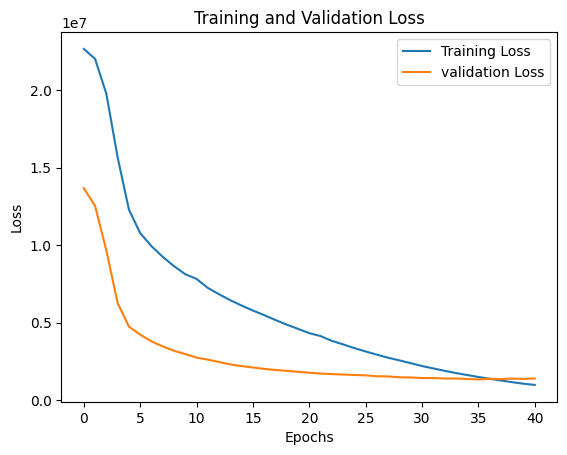

In [25]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
